In [1]:
%reload_ext autoreload

/home/lo/git/fair-network-expansion/environment.py:330: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  self.sigmoid = lambda x: 1 / (1 + torch.exp(-20(x-dmin)))


parabolic
No groups file provided. Trying to use the default groups file.


/home/lo/anaconda3/envs/fair-nw-expansion-linux/lib/python3.10/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /home/conda/feedstock_root/build_artifacts/pytorch-recipe_1650977166858/work/aten/src/ATen/native/TensorShape.cpp:2227.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Number of trainable parameters actor-critic: 182912 / 139181
Starts training on cuda - Model location is result/diagonal_5x5_20220730_14_22_37.670833


/home/lo/git/fair-network-expansion/environment.py:58: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  grid_x = (vector_idx // self.grid_y_size)


epoch 0, average_reward: 0.059, actor_loss: -3.9776,  sf: 0.6125, ll: 6.09, critic_loss: 0.0796, cost_time: 4.0906s
epoch 1, average_reward: 0.045, actor_loss: 1242.8704,  sf: 0.5844, ll: 5.54, critic_loss: 4770.1895, cost_time: 2.8266s
epoch 2, average_reward: 0.070, actor_loss: 5.1324,  sf: 0.6169, ll: 6.50, critic_loss: 0.0952, cost_time: 3.7006s
epoch 3, average_reward: 0.075, actor_loss: -1595.9237,  sf: 0.6036, ll: 6.58, critic_loss: 5798.4531, cost_time: 4.0087s
epoch 4, average_reward: 0.064, actor_loss: -1477.6577,  sf: 0.5921, ll: 6.04, critic_loss: 5786.8584, cost_time: 3.4199s
epoch 5, average_reward: 0.035, actor_loss: -773.9726,  sf: 0.5923, ll: 5.32, critic_loss: 2020.0905, cost_time: 2.7250s
epoch 6, average_reward: 0.044, actor_loss: -235.0258,  sf: 0.5817, ll: 4.27, critic_loss: 294.0408, cost_time: 1.9002s
epoch 7, average_reward: 0.011, actor_loss: -36.6025,  sf: 0.5529, ll: 3.06, critic_loss: 14.9040, cost_time: 1.1985s
epoch 8, average_reward: 0.008, actor_loss: 1

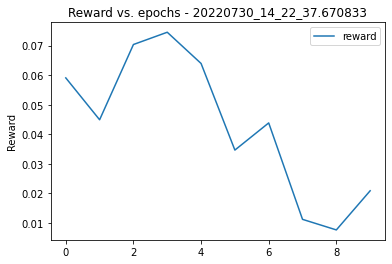

In [2]:
%autoreload
import torch
import numpy as np
import json
import os
import argparse
import matplotlib.pyplot as plt
import matplotlib as mpl

from pathlib import Path
from main import set_seed
from environment import Environment
from constraints import ForwardConstraints
from trainer import Trainer

from constants import device

args_dict = {
  "hidden_size": 128,
  "static_size": 2,
  "dynamic_size": 1,
  "num_layers": 1,
  "dropout": 0.1,
  "seed": None,
  "checkpoint": None,
  "test": False,
  "epoch_max": 10,
  "train_size": 128,
  "line_unit_price": 1.0,
  "station_price": 5.0,
  "result_path": None,
  "actor_lr": 0.01,
  "critic_lr": 0.01,
  "actor_mlp_layers": 5,
  "critic_mlp_layers": 4,
  "station_num_lim": 25,
  "budget": 210,
  "max_grad_norm": 2.0,
  "environment": "diagonal_5x5",
  "reward": "weighted",
  "ses_weight": 0,
  "var_lambda": 0,
  "constraint_free": True,
  "cf_reward_scaling": "parabolic",
  "cf_efficient_station": None,
  "ggi_weight": 2,
  "groups_file": None,
  "arch": "pointer",
  "no_log": True,
  "use_abs": False,
  "early_stopping": 0,
  "plot_every": 0,
  "cf_dmin": 1,
  "cf_dmax": 1.4
}
args = argparse.Namespace(**args_dict)
if args.seed:
    set_seed(args.seed)
environment = Environment(Path(f"./environments/{args.environment}"), groups_file=args.groups_file, reward_scaling_fn=args.cf_reward_scaling, efficient_station_fn=args.cf_efficient_station, dmin=args.cf_dmin, dmax=args.cf_dmax)
constraints = ForwardConstraints(environment.grid_x_size, environment.grid_y_size, environment.existing_lines_full, environment.grid_to_vector)
trainer = Trainer(environment, constraints, args)
trainer.train(args)


In [3]:
dmin = torch.Tensor([1])
dmax = torch.Tensor([4])
import math

desired_mu = (dmin + dmax) / 2
desired_var = (dmax - dmin) / 2
desired_mu_fn = lambda m, s: torch.log(m**2 / (torch.sqrt(m**2 + s**2)))
desired_var_fn = lambda m, s: torch.log(1 + (s**2 / m**2))
mu = desired_mu_fn(desired_mu, desired_var)
var = desired_var_fn(desired_mu, desired_var)
log_gaussian = lambda x: 1 / (x * torch.sqrt(2*math.pi*desired_var)) * \
                                        torch.exp((-(torch.log(x)-desired_mu)**2)\
                                            /(2*desired_var))
def p_Z_G(Z) -> torch.Tensor:
    pass

def p_ij_G(i,j) -> torch.Tensor:
    i = environment.vector_to_grid(i)
    print(i)
    j = environment.vector_to_grid(j)
    print(j)
    d_ij = torch.Tensor([1000])
    print(torch.cdist(i,j))
    return log_gaussian(d_ij)
    

i = torch.Tensor([0]).unsqueeze(0).transpose(0,1)
j = torch.Tensor([4]).unsqueeze(0)

p_ij_G(i,j)

tensor([[0.],
        [0.]])
tensor([[0.],
        [4.]])
tensor([[0., 4.],
        [0., 4.]])


tensor([5.0157e-07])

In [15]:
# dynamic = torch.zeros((1, args.dynamic_size, environment.grid_size),
#                             device=device).float()
# tour_idx = trainer.actor.forward(environment.static, dynamic, 5)[0]
# print(tour_idx)
tour_idx = torch.Tensor([[0, 5, 10, 14, 8]]).long()

In [16]:
a = torch.Tensor([[0,0], [0,4]])
b = torch.Tensor([[0,0], [4,0]])

torch.cdist(a, b)

tensor([[0.0000, 4.0000],
        [4.0000, 5.6569]])

In [25]:
od_scaling_mask = torch.zeros(environment.grid_size, environment.grid_size, device=device)
# for r in od_scaling_mask:
#     print(r)

print(tour_idx)
tour_grid = environment.station_distance_matrix(tour_idx)
a = torch.cdist(tour_grid, tour_grid)

ind = torch.combinations(tour_idx[0])

print(tour_idx.type())
print(od_scaling_mask[tour_idx[0], tour_idx[0]])
# print(a)
# for r in od_scaling_mask:
#     print(r)
# print(torch.is(a))

tensor([[ 0,  5, 10, 14,  8]])
tensor([[ 0,  5],
        [ 0, 10],
        [ 0, 14],
        [ 0,  8],
        [ 5, 10],
        [ 5, 14],
        [ 5,  8],
        [10, 14],
        [10,  8],
        [14,  8]])
torch.LongTensor
tensor([0., 0., 0., 0., 0.], device='cuda:0')
